# Project 1
## Treyson Grange & Sayali Sali 

treyson.grange@usu.edu or treyson.grange@outlook.com

# First I'm doing some loading and taking a look at our data to find things to analyze

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Analyses 1
## Most improved player throughout their career

In [47]:
# AB = At Bats
# H = Hits
# HR = Home Runs
# RBI = Runs Batted In
# SB = Stolen Bases
# CS = Caught Stealing
# BB = Walks
# SO = Strikeouts
# IBB = Intentional Walks
# HBP = Hit By Pitch
# SH = Sacrifice Hits
# SF = Sacrifice Flies

batting = pd.read_csv('baseball/core/Batting.csv')
#rid some columns
batting = batting[['playerID', 'yearID', 'AB', 'H', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF']]

#rid nan
batting = batting.dropna()

#get first and last year
battingFirst = batting.groupby('playerID').first()


battingLast = batting.groupby('playerID').last()

#merge
battingFirstLast = pd.merge(battingFirst, battingLast, on='playerID')

#now we subtract to find their progress.
battingFirstLast['AB'] = battingFirstLast['AB_y'] - battingFirstLast['AB_x']
battingFirstLast['H'] = battingFirstLast['H_y'] - battingFirstLast['H_x']
battingFirstLast['HR'] = battingFirstLast['HR_y'] - battingFirstLast['HR_x']
battingFirstLast['RBI'] = battingFirstLast['RBI_y'] - battingFirstLast['RBI_x']
battingFirstLast['SB'] = battingFirstLast['SB_y'] - battingFirstLast['SB_x']
battingFirstLast['CS'] = battingFirstLast['CS_y'] - battingFirstLast['CS_x']
battingFirstLast['BB'] = battingFirstLast['BB_y'] - battingFirstLast['BB_x']
battingFirstLast['SO'] = battingFirstLast['SO_y'] - battingFirstLast['SO_x']
battingFirstLast['IBB'] = battingFirstLast['IBB_y'] - battingFirstLast['IBB_x']
battingFirstLast['HBP'] = battingFirstLast['HBP_y'] - battingFirstLast['HBP_x']
battingFirstLast['SH'] = battingFirstLast['SH_y'] - battingFirstLast['SH_x']
battingFirstLast['SF'] = battingFirstLast['SF_y'] - battingFirstLast['SF_x']

#rid more columns
battingFirstLast = battingFirstLast[['AB', 'H', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF']] 

battingFirstLast['Sum'] = battingFirstLast.sum(axis=1)

#sort
battingFirstLast = battingFirstLast.sort_values(by=['Sum'], ascending=False)
battingFirstLast = battingFirstLast.drop(columns=['Sum'])

#get name
people = pd.read_csv('baseball/core/People.csv')

#merge with names
battingFirstLastName = pd.merge(battingFirstLast, people, on='playerID')

battingFirstLastName = battingFirstLastName[['nameFirst', 'nameLast', 'AB', 'H', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF']]

#show top 10
battingFirstLastName = battingFirstLastName.head(5)

#getnames
battingFirstLastName['nameFirst'] = battingFirstLastName['nameFirst'] + ' '
battingFirstLastName['nameLast'] = battingFirstLastName['nameLast'] + ' '
battingFirstLastName['name'] = battingFirstLastName['nameFirst'] + battingFirstLastName['nameLast']

# Now let's get rid of the columns we don't need
battingFirstLastName = battingFirstLastName[['name', 'AB', 'H', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF']]
display(battingFirstLastName)

#now lets make a graph using seaborn




,name,AB,H,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF
0,Jonathan Schoop,608,178,31,104.0,1.0,0.0,34,140.0,0.0,11.0,0.0,7.0
1,Nelson Cruz,551,159,39,119.0,1.0,1.0,68,140.0,7.0,12.0,0.0,7.0
2,Charlie Blackmon,546,188,36,96.0,9.0,9.0,62,127.0,8.0,10.0,2.0,3.0
3,Nick Castellanos,596,162,26,101.0,4.0,5.0,41,141.0,0.0,5.0,0.0,5.0
4,Aaron Judge,458,139,48,104.0,9.0,3.0,118,166.0,11.0,4.0,0.0,3.0


## Most Improved Player based on multiple arguments
I asked the internet what goes into the arguement for the 'best player' and it told me that some of the most important were
- Home Runs
- Runs Batted In
- Stolen Bases
- Walks
- Hits


The most improved player is: Aaron Judge 


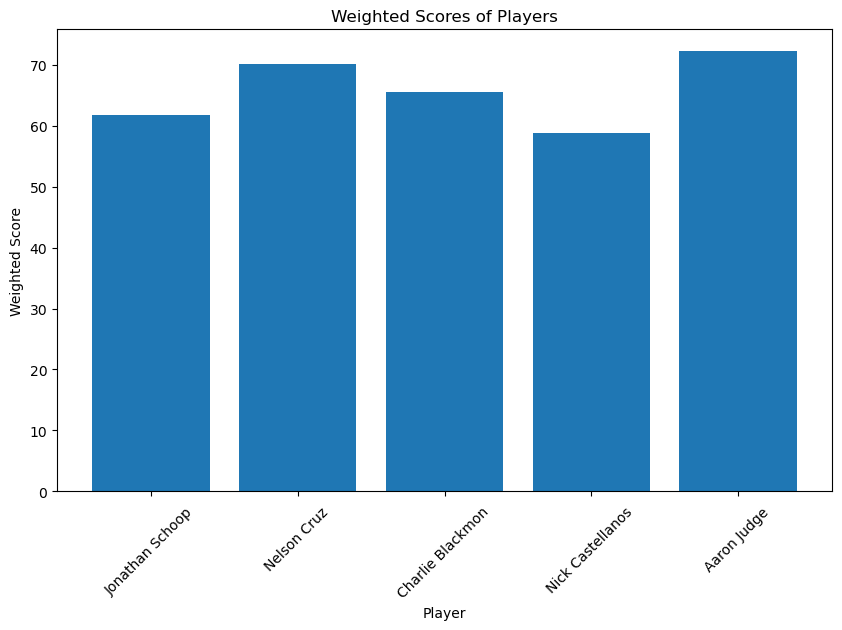

In [48]:
# Calculate weighted score for each player
battingFirstLastName['Score'] = (battingFirstLastName['HR'] * 0.3) + (battingFirstLastName['RBI'] * 0.3) + (battingFirstLastName['SB'] * 0.1) + (battingFirstLastName['BB'] * 0.1) + (battingFirstLastName['H'] * 0.1)

# Find the player with the highest score
best_player = battingFirstLastName.loc[battingFirstLastName['Score'].idxmax()]

# Print the best player
print("The most improved player is:", best_player['name'])
# Plot the weighted scores
plt.figure(figsize=(10, 6))
plt.bar(battingFirstLastName['name'], battingFirstLastName['Score'])
plt.xlabel('Player')
plt.ylabel('Weighted Score')
plt.title('Weighted Scores of Players')
plt.xticks(rotation=45)
plt.show()


But if we are just dealing with their "At Bats" the results are very different.

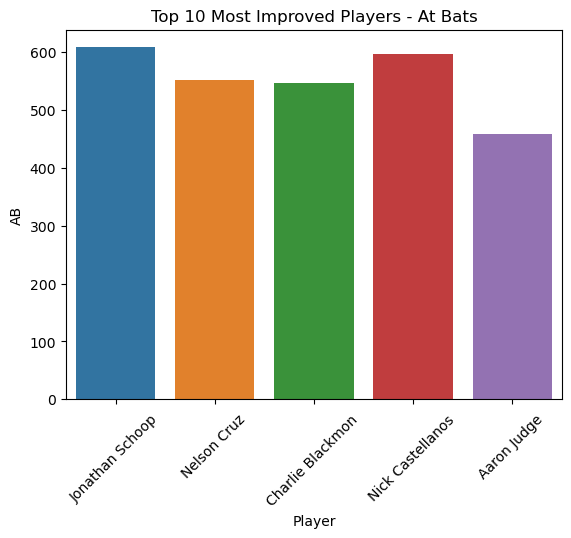

In [49]:
sns.barplot(data=battingFirstLastName, x='name', y='AB')
plt.xticks(rotation=45)
plt.xlabel('Player')
plt.ylabel('AB')
plt.title('Top 10 Most Improved Players - At Bats')
plt.show()


# Analyses
## Which colleges give the most paid players

In [50]:
import pandas as pd

# Read the collegeplaying.csv file
college_playing = pd.read_csv('baseball/core/CollegePlaying.csv')

# Read the salaries.csv file
salaries = pd.read_csv('baseball/core/Salaries.csv')

# Merge the college_playing and salaries dataframes on the playerID column
merged_data = pd.merge(college_playing, salaries, on='playerID')

# Group the data by college and calculate the count of players for each college
college_players_count = merged_data.groupby('schoolID')['playerID'].nunique()

# Filter out schools with less than 5 players
valid_schools = college_players_count[college_players_count >= 10].index

# Filter the merged_data dataframe to include only valid schools
merged_data_filtered = merged_data[merged_data['schoolID'].isin(valid_schools)]

# Group the filtered data by college and calculate the sum of salaries for each college
college_salaries = merged_data_filtered.groupby('schoolID')['salary'].sum()
# display(college_salaries)

college_salaries = merged_data_filtered.groupby('schoolID')['salary'].mean()
# Read the Schools.csv file
schools = pd.read_csv('baseball/core/Schools.csv')
college_salaries = pd.merge(college_salaries, schools, left_on='schoolID', right_on='schoolID')
college_salaries = college_salaries.rename(columns={'name_full': 'school_name'})
college_salaries = college_salaries[['school_name', 'salary']]
college_salaries = college_salaries.sort_values(by='salary', ascending=False)
display(college_salaries.head(10))
display(college_salaries.tail(10))
display(college_salaries.size)





,school_name,salary
61,Missouri State University,4.506895e+06
25,Georgia Institute of Technology,4.121502e+06
68,"San Jacinto College, North Campus",3.801758e+06
33,California State University Long Beach,3.662576e+06
78,University of Washington,3.395569e+06
52,Oregon State University,2.891241e+06
41,Mississippi State University,2.860981e+06
40,University of Missouri Columbia,2.820569e+06
73,University of Southern California,2.805261e+06
46,The Ohio State University,2.784907e+06


,school_name,salary
42,North Carolina State University,778808.960630
69,Texas Tech University,759959.041237
51,Oral Roberts University,739615.170940
66,Blinn College,704782.258065
13,Orange Coast College,699895.152174
7,Cerritos College,647713.636364
27,University of Hawaii at Manoa,603896.387387
24,Middle Georgia College,581027.767857
65,Tulane University,548476.012346
16,Creighton University,384276.859504


162

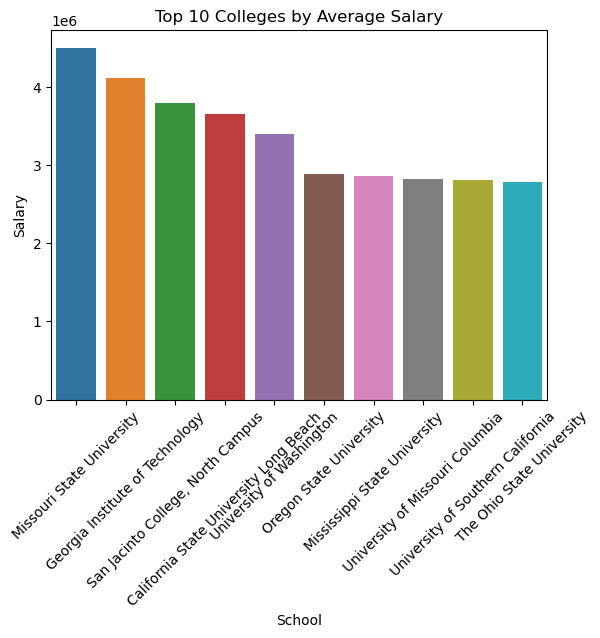

In [51]:
top_10_colleges = college_salaries.head(10)

sns.barplot(data=top_10_colleges, x='school_name', y='salary')
plt.xticks(rotation=45)
plt.xlabel('School')
plt.ylabel('Salary')
plt.title('Top 10 Colleges by Average Salary')
plt.show()






In [52]:
missouri = college_playing[college_playing['schoolID'] == 'missouri']
missouri
missouri_salaries = pd.merge(missouri, salaries, on='playerID')
missouri_salaries
missouri_with_names = pd.merge(missouri_salaries, people, on='playerID')
missouri_with_names.sort_values(by='salary', ascending=False)

,playerID,schoolID,yearID_x,yearID_y,teamID,lgID,salary,birthYear,birthMonth,birthDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
109,scherma01,missouri,2006,2016,WAS,NL,22142857,1984.0,7.0,27.0,...,Scherzer,Maxwell M.,210.0,75.0,R,R,2008-04-29,2017-09-30,schem001,scherma01
93,scherma01,missouri,2004,2016,WAS,NL,22142857,1984.0,7.0,27.0,...,Scherzer,Maxwell M.,210.0,75.0,R,R,2008-04-29,2017-09-30,schem001,scherma01
101,scherma01,missouri,2005,2016,WAS,NL,22142857,1984.0,7.0,27.0,...,Scherzer,Maxwell M.,210.0,75.0,R,R,2008-04-29,2017-09-30,schem001,scherma01
92,scherma01,missouri,2004,2015,WAS,NL,17142000,1984.0,7.0,27.0,...,Scherzer,Maxwell M.,210.0,75.0,R,R,2008-04-29,2017-09-30,schem001,scherma01
100,scherma01,missouri,2005,2015,WAS,NL,17142000,1984.0,7.0,27.0,...,Scherzer,Maxwell M.,210.0,75.0,R,R,2008-04-29,2017-09-30,schem001,scherma01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,ottoda01,missouri,1985,1990,OAK,AL,102000,1964.0,11.0,12.0,...,Otto,David Alan,210.0,79.0,L,L,1987-09-08,1994-08-10,ottod001,ottoda01
68,littlsc01,missouri,1983,1990,PIT,NL,100000,1963.0,1.0,19.0,...,Little,Dennis Scott,198.0,72.0,R,R,1989-07-27,1989-08-06,litts001,littlsc01
115,silveda01,missouri,1987,1993,NYA,AL,10900,1967.0,9.0,29.0,...,Silvestri,David Joseph,180.0,72.0,R,R,1992-04-27,1999-05-16,silvd001,silveda01
110,silveda01,missouri,1986,1993,NYA,AL,10900,1967.0,9.0,29.0,...,Silvestri,David Joseph,180.0,72.0,R,R,1992-04-27,1999-05-16,silvd001,silveda01


# Analyses 3
## Average RBI of different baseball teams within specific age ranges.

/tmp/ipykernel_183456/2708179292.py:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  team_comparison_1 = age_1.groupby('teamID').mean()
/tmp/ipykernel_183456/2708179292.py:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  team_comparison_2 = age_2.groupby('teamID').mean()
/tmp/ipykernel_183456/2708179292.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  team_comparison_3 = age_3.groupby('teamID').mean()


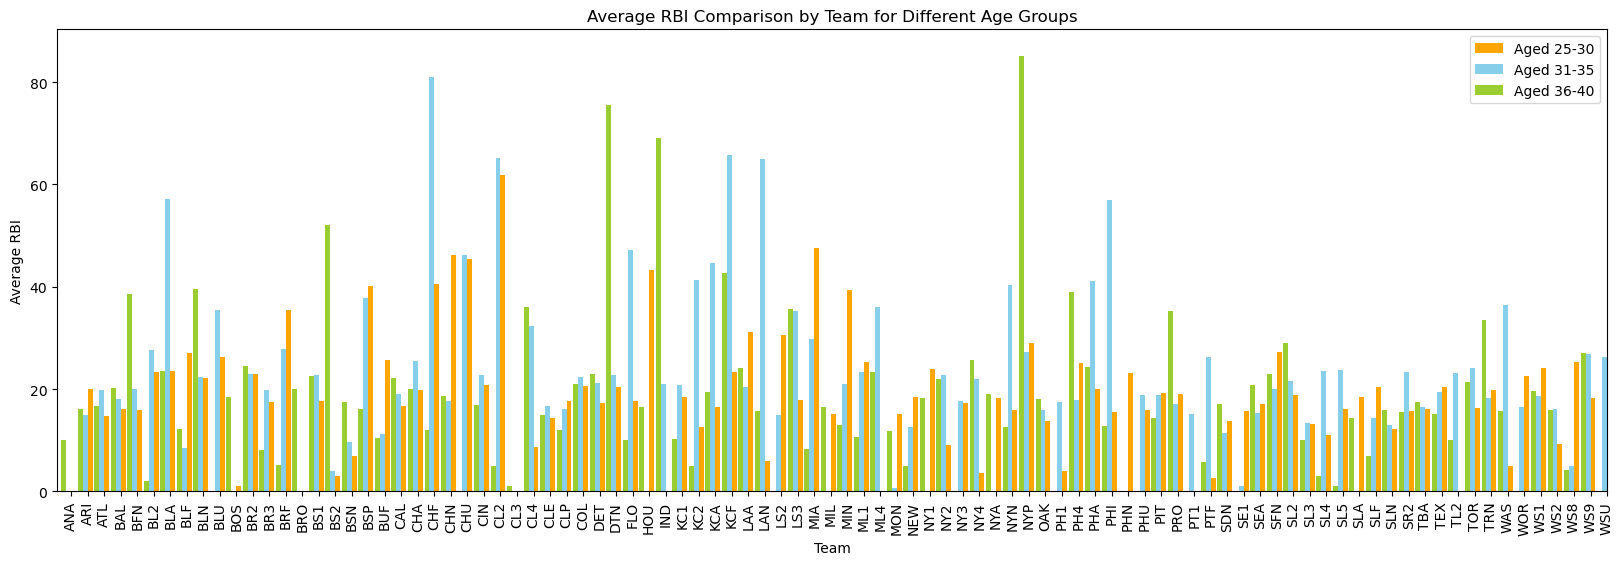

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data loading
people = pd.read_csv('baseball/core/People.csv')
batting = pd.read_csv('baseball/core/Batting.csv')

# Merge the two tables on 'playerID'
batting_players = pd.merge(people, batting, on='playerID')

# Calculate age
batting_players['age'] = batting_players['yearID'] - batting_players['birthYear']

# Select age ranges for analysis
age_range_1 = (25, 30)
age_range_2 = (31, 35)
age_range_3 = (36, 40)
# Filter data for the selected age ranges
age_1 = batting_players[(batting_players['age'] >= age_range_1[0]) & (batting_players['age'] <= age_range_1[1])]
age_2 = batting_players[(batting_players['age'] >= age_range_2[0]) & (batting_players['age'] <= age_range_2[1])]
age_3 = batting_players[(batting_players['age'] >= age_range_3[0]) & (batting_players['age'] <= age_range_3[1])]
# Group data by team and calculate average batting statistics
team_comparison_1 = age_1.groupby('teamID').mean()
team_comparison_2 = age_2.groupby('teamID').mean()
team_comparison_3 = age_3.groupby('teamID').mean()
# Plotting
fig, ax = plt.subplots(figsize=(20, 6))

# Plot bars for the first age group
team_comparison_1['RBI'].plot(kind='bar', position=0, width=0.3, color='orange', label=f'Aged {age_range_1[0]}-{age_range_1[1]}')
team_comparison_2['RBI'].plot(kind='bar', position=1, width=0.3, color='skyblue', label=f'Aged {age_range_2[0]}-{age_range_2[1]}')
team_comparison_3['RBI'].plot(kind='bar', position=2, width=0.3, color='yellowgreen', label=f'Aged {age_range_3[0]}-{age_range_3[1]}')

plt.xlabel('Team')
plt.ylabel('Average RBI')
plt.title(f'Average RBI Comparison by Team for Different Age Groups')
plt.legend()
plt.show()




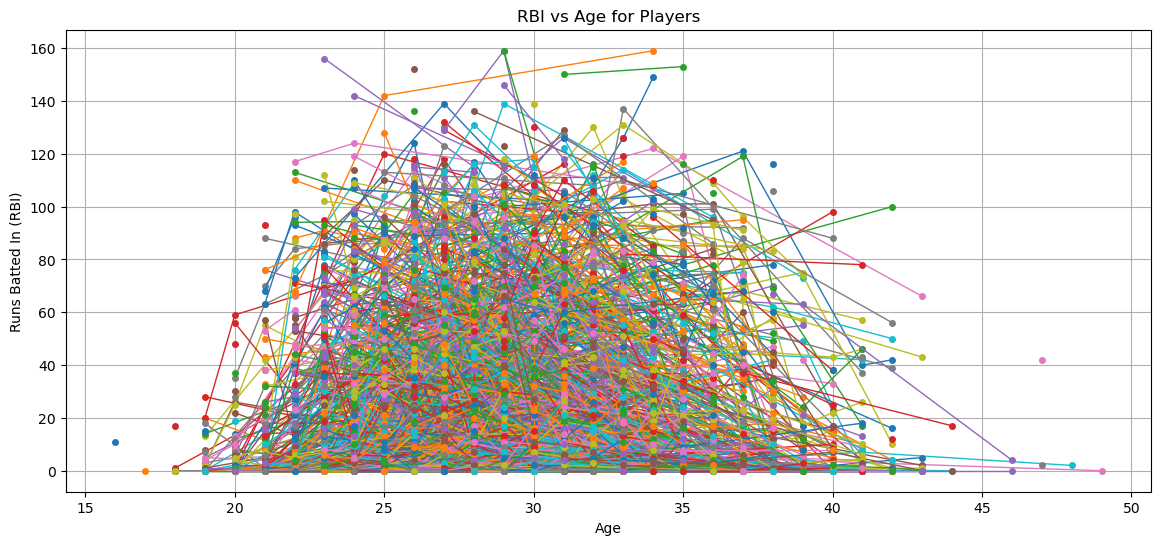

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data loading
master = pd.read_csv('baseball/core/People.csv')
batting = pd.read_csv('baseball/core/Batting.csv')

# Merge the two tables on 'playerID'
batting_player = pd.merge(master, batting, on='playerID')
batting_player=batting_player.sample(frac=0.1)
# Calculate age
batting_player['age'] = batting_player['yearID'] - batting_player['birthYear']
batting_player.sort_values('age', inplace=True)
# Plot line graph with different colors for each playerID
player_ids = batting_player['playerID'].unique()

plt.figure(figsize=(14, 6))

for player_id in player_ids:
    player_data = batting_player[batting_player['playerID'] == player_id]
    plt.plot(player_data['age'], player_data['RBI'], marker='o', linestyle='-', label=f'Player {player_id}', linewidth=1, markersize=4)

plt.xlabel('Age')
plt.ylabel('Runs Batted In (RBI)')
plt.title('RBI vs Age for Players')

plt.grid(True)
plt.show()

# Analyses 4
## Batting Averages of Pitchers and Batters in baseabll over the years

/tmp/ipykernel_183456/3252152714.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pitchers['BattingAveragepitchers'] = pitchers['H'] / pitchers['AB']
/tmp/ipykernel_183456/3252152714.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batters['BattingAveragebatters'] = batters['H'] / batters['AB']


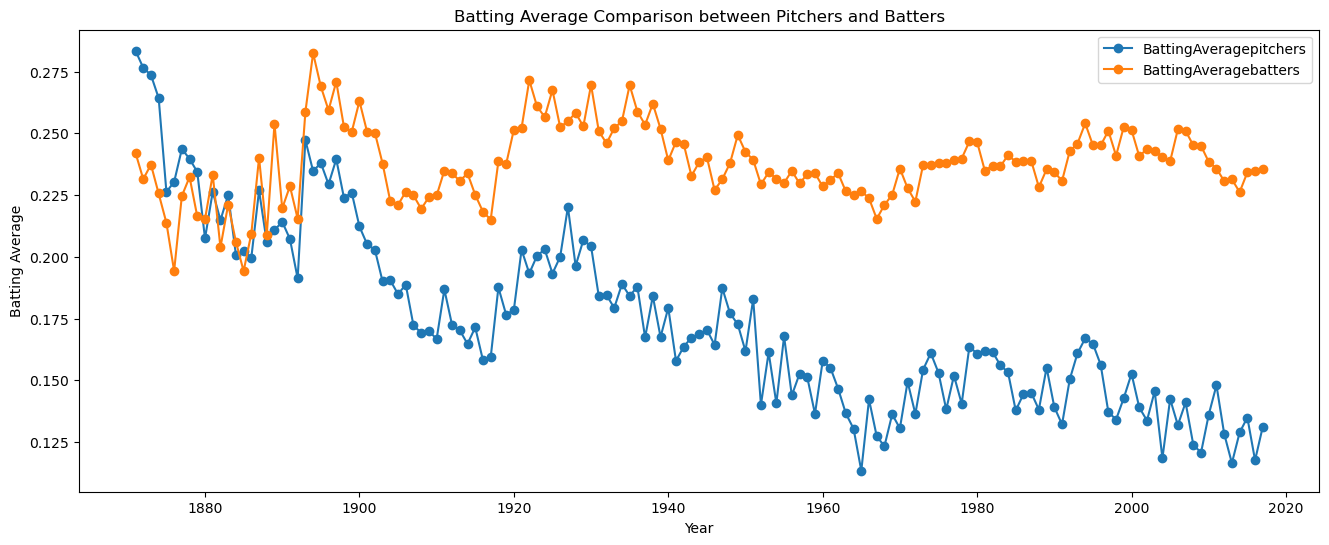

In [55]:
# Sample data loading
batting = pd.read_csv('baseball/core/Batting.csv')
pitching = pd.read_csv('baseball/core/Pitching.csv')

# Extract unique playerIDs from the Pitching table
pitchers_player_ids = pitching['playerID'].unique()

# Filter Batting table for remaining players (not in the Pitching table)
batters = batting[~batting['playerID'].isin(pitchers_player_ids)]
pitchers = batting[batting['playerID'].isin(pitchers_player_ids)]

# Calculate Batting Average (H/AB) for both groups
pitchers['BattingAveragepitchers'] = pitchers['H'] / pitchers['AB']
batters['BattingAveragebatters'] = batters['H'] / batters['AB']

# Merge pitchers and batters on 'playerID' and 'yearID'
players = pd.merge(pitchers[['playerID', 'yearID', 'BattingAveragepitchers']], batters[['playerID', 'yearID', 'BattingAveragebatters']], on=['playerID', 'yearID'], how='outer')

# Plotting
fig, ax = plt.subplots(figsize=(16, 6))

ss = players.groupby('yearID').agg({'BattingAveragepitchers':'mean', 'BattingAveragebatters':'mean'}).reset_index()

# Plotting BattingAveragep
ax.plot(ss['yearID'], ss['BattingAveragepitchers'], marker='o', label='BattingAveragepitchers')

# Plotting BattingAverageb
ax.plot(ss['yearID'], ss['BattingAveragebatters'], marker='o', label='BattingAveragebatters')

# Set plot labels and legend
ax.set_xlabel('Year')
ax.set_ylabel('Batting Average')
ax.set_title('Batting Average Comparison between Pitchers and Batters')
ax.legend()

# Show the plot
plt.show()
